# Disney Movies & Disney Plus TV K Nearest Neighbours

In [697]:
# Initial imports
import pandas as pd
import numpy as np
import hvplot.pandas
from path import Path
import plotly.express as px

#visualisation
import seaborn as sns
import mplcursors
import matplotlib.pyplot as plt

#ML imports 
import tensorflow as tf

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
#from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn import neighbors

#%matplotlib notebook

## Data Preprocessing

In [2]:
# Import the Block Buster Movies dataset
bb_df = pd.read_csv('input/ML_bb_ready.csv')
bb_df.head()

,Title,Year,Rated,Released,Runtime,Director,Writer,Actors,Language,Country,Awards,Metascore,IMDBRating,imdbVotes,imdbID,total_gross,inflation_adjusted_gross,genres
0,101 Dalmatians,1996,G,27 Nov 1996,103.0,Stephen Herek,Dodie Smith| John Hughes,Glenn Close| Jeff Daniels| Joely Richardson,English|Spanish,United States| United Kingdom,Nominated for 1 BAFTA Film Award3 wins & 10 no...,49.0,5.7,109762,tt0115433,153000000.0,1.386569e+09,Adventure|Children|Comedy
1,101 Dalmatians,1996,G,27 Nov 1996,103.0,Stephen Herek,Dodie Smith| John Hughes,Glenn Close| Jeff Daniels| Joely Richardson,English|Spanish,United States| United Kingdom,Nominated for 1 BAFTA Film Award3 wins & 10 no...,49.0,5.7,109762,tt0115433,136189294.0,2.352021e+08,Adventure|Children|Comedy
2,102 Dalmatians,2000,G,22 Nov 2000,100.0,Kevin Lima,Dodie Smith| Kristen Buckley| Brian Regan,Glenn Close| Gérard Depardieu| Ioan Gruffudd,English,United States| United Kingdom,Nominated for 1 Oscar. 1 win & 8 nominations t...,35.0,4.9,37045,tt0211181,66941559.0,1.053377e+08,Adventure|Comedy|Family
3,1492: Conquest of Paradise,1992,PG-13,09 Oct 1992,154.0,Ridley Scott,Rose Bosch,Gérard Depardieu| Armand Assante| Sigourney We...,English|Spanish|Latin|Arabic,United Kingdom| France| Spain,2 nominations,47.0,6.4,29990,tt0103594,7099531.0,1.371176e+07,Adventure|Biography|Drama
4,"20,000 Leagues Under the Sea",1954,G,20 Jul 1955,127.0,Richard Fleischer,Earl Felton| Jules Verne,Kirk Douglas| James Mason| Paul Lukas,English,United States,Won 2 Oscars. 5 wins & 3 nominations total,83.0,7.2,33152,tt0046672,28200000.0,2.840652e+08,Adventure|Drama|Sci-Fi


In [3]:
#get the columns
cols = bb_df.columns.tolist()
print(cols)

#rearrange the columns for concat
cols = ['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Director', 'Writer', 'Actors', 'Language', 'Country',\
        'Awards', 'Metascore', 'IMDBRating', 'imdbVotes', 'imdbID', 'genres', 'total_gross',\
        'inflation_adjusted_gross']

['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Director', 'Writer', 'Actors', 'Language', 'Country', 'Awards', 'Metascore', 'IMDBRating', 'imdbVotes', 'imdbID', 'total_gross', 'inflation_adjusted_gross', 'genres']


In [4]:
#columns rearranged

bb_df = bb_df[cols]
bb_df.head()

,Title,Year,Rated,Released,Runtime,Director,Writer,Actors,Language,Country,Awards,Metascore,IMDBRating,imdbVotes,imdbID,genres,total_gross,inflation_adjusted_gross
0,101 Dalmatians,1996,G,27 Nov 1996,103.0,Stephen Herek,Dodie Smith| John Hughes,Glenn Close| Jeff Daniels| Joely Richardson,English|Spanish,United States| United Kingdom,Nominated for 1 BAFTA Film Award3 wins & 10 no...,49.0,5.7,109762,tt0115433,Adventure|Children|Comedy,153000000.0,1.386569e+09
1,101 Dalmatians,1996,G,27 Nov 1996,103.0,Stephen Herek,Dodie Smith| John Hughes,Glenn Close| Jeff Daniels| Joely Richardson,English|Spanish,United States| United Kingdom,Nominated for 1 BAFTA Film Award3 wins & 10 no...,49.0,5.7,109762,tt0115433,Adventure|Children|Comedy,136189294.0,2.352021e+08
2,102 Dalmatians,2000,G,22 Nov 2000,100.0,Kevin Lima,Dodie Smith| Kristen Buckley| Brian Regan,Glenn Close| Gérard Depardieu| Ioan Gruffudd,English,United States| United Kingdom,Nominated for 1 Oscar. 1 win & 8 nominations t...,35.0,4.9,37045,tt0211181,Adventure|Comedy|Family,66941559.0,1.053377e+08
3,1492: Conquest of Paradise,1992,PG-13,09 Oct 1992,154.0,Ridley Scott,Rose Bosch,Gérard Depardieu| Armand Assante| Sigourney We...,English|Spanish|Latin|Arabic,United Kingdom| France| Spain,2 nominations,47.0,6.4,29990,tt0103594,Adventure|Biography|Drama,7099531.0,1.371176e+07
4,"20,000 Leagues Under the Sea",1954,G,20 Jul 1955,127.0,Richard Fleischer,Earl Felton| Jules Verne,Kirk Douglas| James Mason| Paul Lukas,English,United States,Won 2 Oscars. 5 wins & 3 nominations total,83.0,7.2,33152,tt0046672,Adventure|Drama|Sci-Fi,28200000.0,2.840652e+08


In [5]:
bb_df['genres'].value_counts()

Animation|Adventure|Comedy                      30
Comedy|Drama|Romance                            24
Comedy                                          21
Comedy|Drama                                    17
Comedy|Drama|Family                             13
                                                ..
Adventure|Animation|Children|Fantasy|Musical     1
Action|Crime|Sci-Fi                              1
Adventure|Comedy|Fantasy                         1
Animation|Biography|Drama                        1
Documentary|Drama|History                        1
Name: genres, Length: 236, dtype: int64

In [6]:
# Import the Disney Plus TV dataset
tv_df = pd.read_csv('input/ML_tv_ready.csv')
tv_df.head()

,Title,Year,Rated,Released,Runtime,Director,Writer,Actors,Language,Country,Awards,Metascore,IMDBRating,imdbVotes,imdbID,genres
0,Ice Age: A Mammoth Christmas,2011,TV-PG,24 Nov 2011,26,Karen Disher,Sam Harper| Mike Reiss,Ray Romano| John Leguizamo| Denis Leary| Queen...,English,USA,1 nomination.,-1.0,6.5,9671,tt2100546,Animation|Short|Adventure|Comedy|Family|Fantasy
1,The Queen Family Singalong,2021,TV-PG,04 Nov 2021,41,Hamish Hamilton,Brian Strickland,Darren Criss| Adam Lambert| Jimmie Allen,English,United States,NaN,-1.0,5.9,86,tt15716286,Music|Musical
2,The Beatles: Get Back,2021,PG-13,25 Nov 2021,-1,Peter Jackson,NaN,The Beatles| John Lennon| Paul McCartney,English,United Kingdom| New Zealand| United States,4 wins & 4 nominations,-1.0,9.1,18501,tt9735318,Documentary|Biography|Music
3,Becoming Cousteau,2021,PG-13,24 Nov 2021,94,Liz Garbus,Mark Monroe| Pax Wassermann,Vincent Cassel| Carol Burnett| Louis Malle,English|French,United States,Nominated for 1 BAFTA Film Award2 wins & 11 no...,74.0,7.1,834,tt10334438,Documentary|Adventure|Biography
4,Hawkeye,2021,TV-14,24 Nov 2021,60,NaN,NaN,Jeremy Renner| Hailee Steinfeld| Florence Pugh,English|AmericanSign,United States,8 nominations,-1.0,7.7,142549,tt10160804,Action|Adventure|Crime


In [7]:
tv_df['genres'].value_counts()

Documentary                                102
Animation|Short|Comedy                      61
Animation|Short|Adventure                   26
Animation|Action|Adventure                  24
Animation|Adventure|Comedy                  19
                                          ... 
Comedy|Talk-Show                             1
Animation|Action|Comedy                      1
Animation|Short|Action|Adventure|Family      1
Action|Animation|Sci-Fi                      1
Documentary|Short|Sport                      1
Name: genres, Length: 279, dtype: int64

In [8]:
tv_df['total_gross'] = -1
tv_df['inflation_adjusted_gross'] = -1
# tv_df.drop(columns=['Genre'], inplace=True)
tv_df.head()

,Title,Year,Rated,Released,Runtime,Director,Writer,Actors,Language,Country,Awards,Metascore,IMDBRating,imdbVotes,imdbID,genres,total_gross,inflation_adjusted_gross
0,Ice Age: A Mammoth Christmas,2011,TV-PG,24 Nov 2011,26,Karen Disher,Sam Harper| Mike Reiss,Ray Romano| John Leguizamo| Denis Leary| Queen...,English,USA,1 nomination.,-1.0,6.5,9671,tt2100546,Animation|Short|Adventure|Comedy|Family|Fantasy,-1,-1
1,The Queen Family Singalong,2021,TV-PG,04 Nov 2021,41,Hamish Hamilton,Brian Strickland,Darren Criss| Adam Lambert| Jimmie Allen,English,United States,NaN,-1.0,5.9,86,tt15716286,Music|Musical,-1,-1
2,The Beatles: Get Back,2021,PG-13,25 Nov 2021,-1,Peter Jackson,NaN,The Beatles| John Lennon| Paul McCartney,English,United Kingdom| New Zealand| United States,4 wins & 4 nominations,-1.0,9.1,18501,tt9735318,Documentary|Biography|Music,-1,-1
3,Becoming Cousteau,2021,PG-13,24 Nov 2021,94,Liz Garbus,Mark Monroe| Pax Wassermann,Vincent Cassel| Carol Burnett| Louis Malle,English|French,United States,Nominated for 1 BAFTA Film Award2 wins & 11 no...,74.0,7.1,834,tt10334438,Documentary|Adventure|Biography,-1,-1
4,Hawkeye,2021,TV-14,24 Nov 2021,60,NaN,NaN,Jeremy Renner| Hailee Steinfeld| Florence Pugh,English|AmericanSign,United States,8 nominations,-1.0,7.7,142549,tt10160804,Action|Adventure|Crime,-1,-1


In [9]:
tv_df.isna().sum() 

Title                         0
Year                          0
Rated                         0
Released                     10
Runtime                       0
Director                    228
Writer                      194
Actors                       32
Language                     15
Country                       7
Awards                      398
Metascore                     0
IMDBRating                    0
imdbVotes                     0
imdbID                        0
genres                        0
total_gross                   0
inflation_adjusted_gross      0
dtype: int64

In [10]:
#check to see if it takes effect
tv_df[tv_df.Title.str.startswith('Na')]

,Title,Year,Rated,Released,Runtime,Director,Writer,Actors,Language,Country,Awards,Metascore,IMDBRating,imdbVotes,imdbID,genres,total_gross,inflation_adjusted_gross
50,National Geographic Presents: Impact with Gal ...,2021,TV-14,19 Apr 2021,-1,NaN,NaN,Gal Gadot,English,United States,1 win & 1 nomination,-1.0,5.3,86,tt14376656,Documentary,-1,-1
269,Nature Boom Time!,2016,G,01 Mar 2016,-1,NaN,Charlie Engelman,Charlie Engelman| Kirby Engelman| Patrick Rahill,English,United States,NaN,-1.0,7.0,5,tt6805750,Family,-1,-1
320,Nature's Half Acre,1951,Passed,28 Jul 1951,33,James Algar,Winston Hibler| Ted Sears| James Algar,Winston Hibler| Mogens Lind,English,United States,Won 1 Oscar. 1 win & 1 nomination total,-1.0,7.1,200,tt0043839,Documentary|Short|Family,-1,-1


In [11]:
# concat movies & tv datasets

movies_df = pd.concat([bb_df, tv_df], axis=0, ignore_index=True)
movies_df.head()

,Title,Year,Rated,Released,Runtime,Director,Writer,Actors,Language,Country,Awards,Metascore,IMDBRating,imdbVotes,imdbID,genres,total_gross,inflation_adjusted_gross
0,101 Dalmatians,1996,G,27 Nov 1996,103.0,Stephen Herek,Dodie Smith| John Hughes,Glenn Close| Jeff Daniels| Joely Richardson,English|Spanish,United States| United Kingdom,Nominated for 1 BAFTA Film Award3 wins & 10 no...,49.0,5.7,109762,tt0115433,Adventure|Children|Comedy,153000000.0,1.386569e+09
1,101 Dalmatians,1996,G,27 Nov 1996,103.0,Stephen Herek,Dodie Smith| John Hughes,Glenn Close| Jeff Daniels| Joely Richardson,English|Spanish,United States| United Kingdom,Nominated for 1 BAFTA Film Award3 wins & 10 no...,49.0,5.7,109762,tt0115433,Adventure|Children|Comedy,136189294.0,2.352021e+08
2,102 Dalmatians,2000,G,22 Nov 2000,100.0,Kevin Lima,Dodie Smith| Kristen Buckley| Brian Regan,Glenn Close| Gérard Depardieu| Ioan Gruffudd,English,United States| United Kingdom,Nominated for 1 Oscar. 1 win & 8 nominations t...,35.0,4.9,37045,tt0211181,Adventure|Comedy|Family,66941559.0,1.053377e+08
3,1492: Conquest of Paradise,1992,PG-13,09 Oct 1992,154.0,Ridley Scott,Rose Bosch,Gérard Depardieu| Armand Assante| Sigourney We...,English|Spanish|Latin|Arabic,United Kingdom| France| Spain,2 nominations,47.0,6.4,29990,tt0103594,Adventure|Biography|Drama,7099531.0,1.371176e+07
4,"20,000 Leagues Under the Sea",1954,G,20 Jul 1955,127.0,Richard Fleischer,Earl Felton| Jules Verne,Kirk Douglas| James Mason| Paul Lukas,English,United States,Won 2 Oscars. 5 wins & 3 nominations total,83.0,7.2,33152,tt0046672,Adventure|Drama|Sci-Fi,28200000.0,2.840652e+08


In [12]:
movies_df = movies_df.drop_duplicates(subset=['Title', 'Year'], keep='first')
movies_df.reset_index(inplace=True)

In [13]:
movies_df.shape

(1391, 19)

In [14]:
movies_df.count()

index                       1391
Title                       1391
Year                        1391
Rated                       1391
Released                    1381
Runtime                     1391
Director                    1162
Writer                      1192
Actors                      1359
Language                    1376
Country                     1384
Awards                       894
Metascore                   1391
IMDBRating                  1391
imdbVotes                   1391
imdbID                      1391
genres                      1391
total_gross                 1391
inflation_adjusted_gross    1391
dtype: int64

In [15]:
movies_df['genres'] = movies_df['genres'].astype(str)

In [16]:
movies_df.describe()

,index,Year,Runtime,Metascore,IMDBRating,imdbVotes,total_gross,inflation_adjusted_gross
count,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1.391000e+03,1.391000e+03,1.391000e+03
mean,712.757728,1999.827462,74.853343,23.644141,6.339180,6.608166e+04,3.279200e+07,5.499752e+07
std,408.974910,20.841688,46.325825,30.665694,1.563052,1.631694e+05,8.443786e+07,1.644627e+08
min,0.000000,1928.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,358.500000,1994.000000,30.000000,-1.000000,5.800000,1.034500e+03,-1.000000e+00,-1.000000e+00
50%,713.000000,2004.000000,89.000000,-1.000000,6.600000,6.099000e+03,-1.000000e+00,-1.000000e+00
75%,1064.500000,2016.000000,105.000000,52.500000,7.200000,4.208350e+04,2.582203e+07,4.666318e+07
max,1421.000000,2021.000000,566.000000,99.000000,9.100000,1.345654e+06,9.366622e+08,3.479810e+09


In [17]:
#from the above, we can see that IMDBRating is between -1 (NULL) to 10

## Initial EDA To Understand the Dataset

<AxesSubplot:xlabel='IMDBRating', ylabel='Title'>

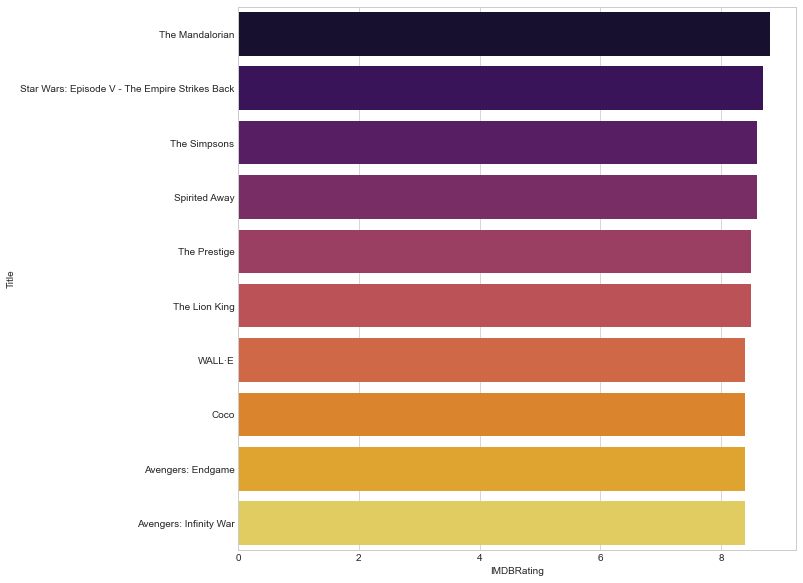

In [18]:
#top 10 highly voted movies where total votes is above 300K votes
top_ten = movies_df[movies_df['imdbVotes'] > 300000]
top_ten.sort_values(by='IMDBRating', ascending=False)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 10))
data = top_ten.sort_values(by='IMDBRating', ascending=False).head(10)
sns.barplot(x="IMDBRating", y="Title", data=data, palette='inferno')

/Users/vuvie/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


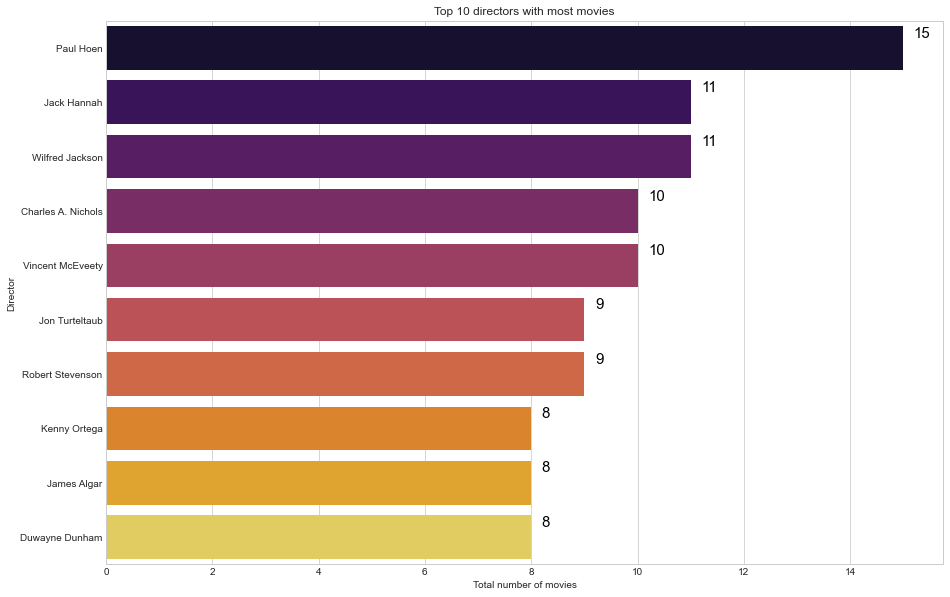

In [19]:
highest_director = movies_df.groupby('Director')['Title'].count().reset_index().sort_values('Title', ascending=False).head(10).set_index('Director')
plt.figure(figsize=(15,10))
ax = sns.barplot(highest_director['Title'], highest_director.index, palette='inferno')
ax.set_title("Top 10 directors with most movies")
ax.set_xlabel("Total number of movies")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

/Users/vuvie/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


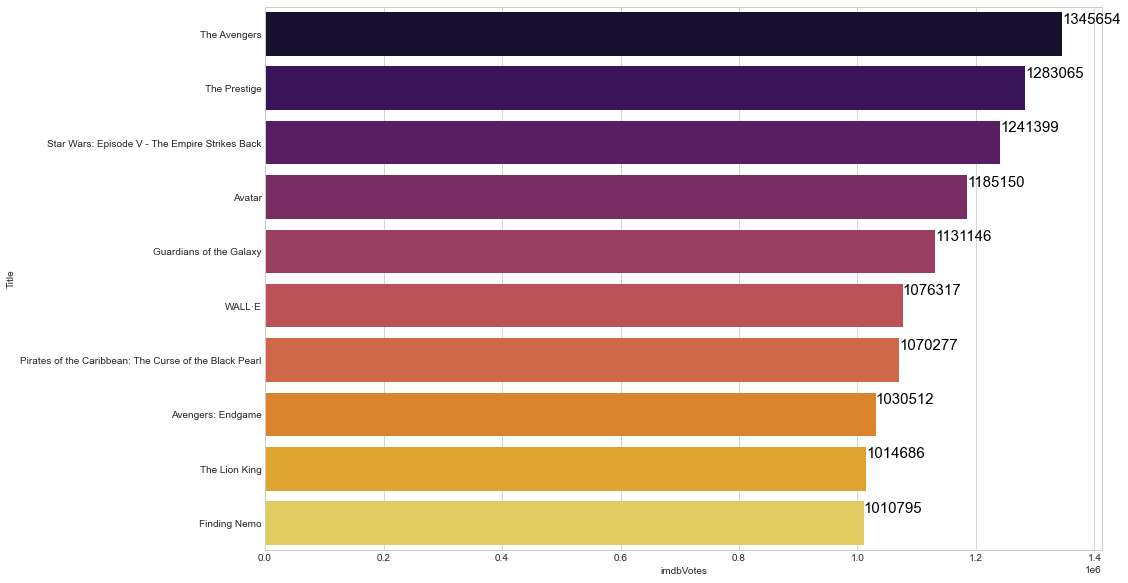

In [20]:
most_rated = movies_df.sort_values('imdbVotes', ascending = False).head(10).set_index('Title')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_rated['imdbVotes'], most_rated.index, palette = 'inferno')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

/Users/vuvie/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


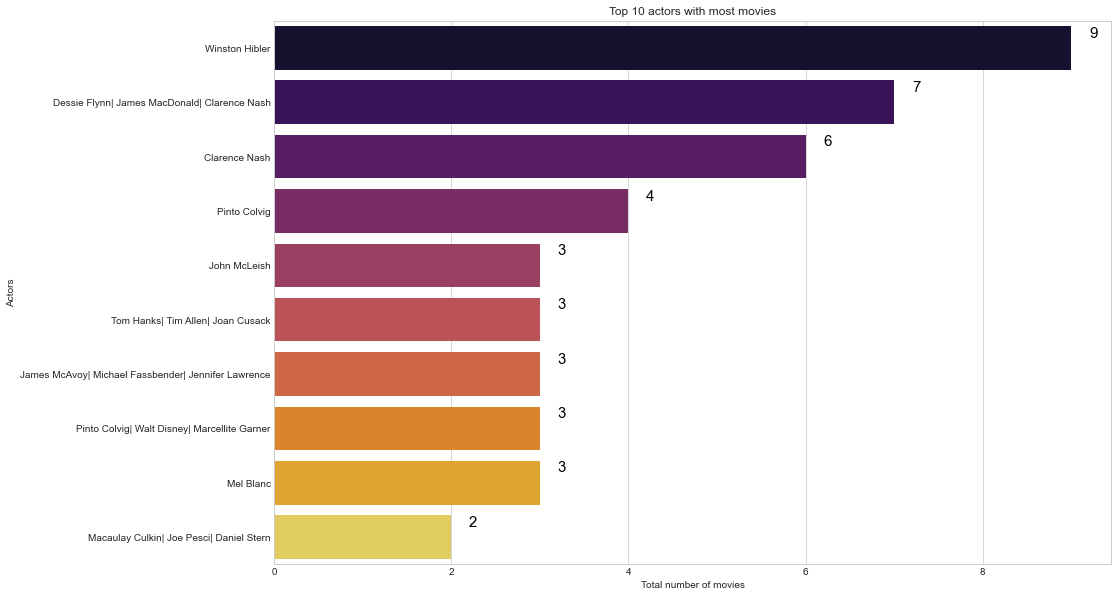

In [21]:
highest_actors = movies_df.groupby('Actors')['Title'].count().reset_index().sort_values('Title', ascending=False).head(10).set_index('Actors')
plt.figure(figsize=(15,10))
ax = sns.barplot(highest_actors['Title'], highest_actors.index, palette='inferno')
ax.set_title("Top 10 actors with most movies")
ax.set_xlabel("Total number of movies")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

/Users/vuvie/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Average rating')

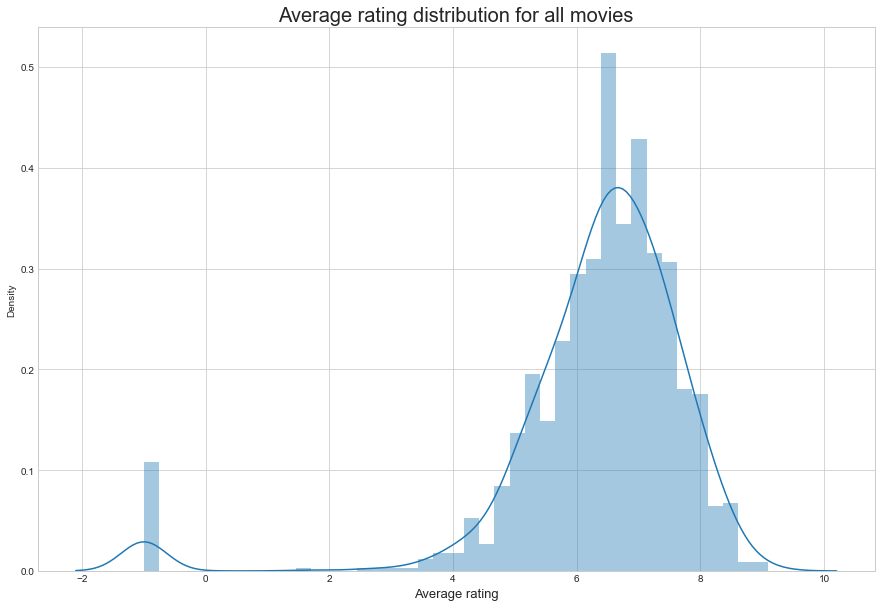

In [22]:
movies_df.IMDBRating = movies_df.IMDBRating.astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(movies_df['IMDBRating'],ax=ax)
ax.set_title('Average rating distribution for all movies',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

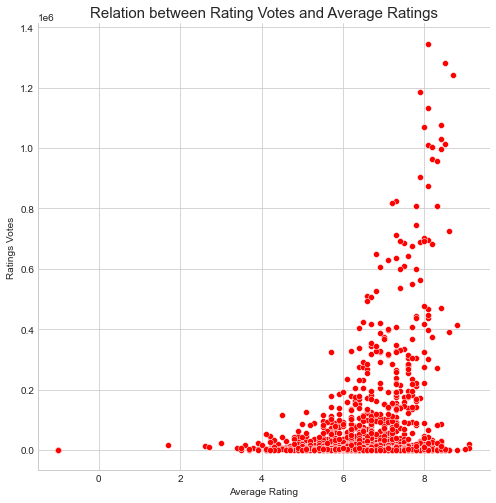

In [23]:
ax = sns.relplot(data=movies_df, x="IMDBRating", y="imdbVotes", color = 'red', sizes=(100, 200), height=7, marker='o')
plt.title("Relation between Rating Votes and Average Ratings",fontsize = 15)
ax.set_axis_labels("Average Rating", "Ratings Votes")
mplcursors.cursor(hover=True)

<Figure size 1080x720 with 0 Axes>

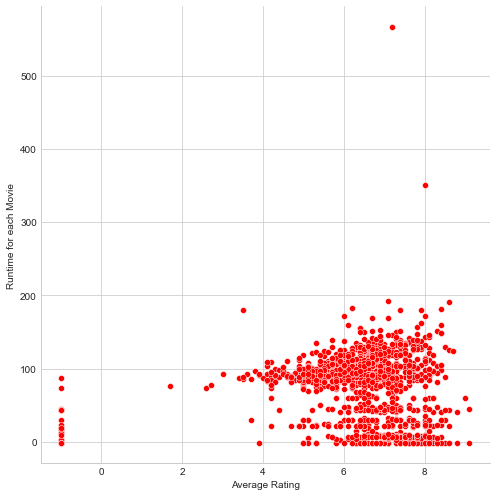

In [24]:
plt.figure(figsize=(15,10))
ax = sns.relplot(x="IMDBRating", y="Runtime", data = movies_df, color = 'red',sizes=(100, 200), height=7, marker='o')
ax.set_axis_labels("Average Rating", "Runtime for each Movie")

In [25]:
# movies_df.loc[ (movies_df['IMDBRating'] >= 0) & (movies_df['IMDBRating'] <= 2), 'rating_between'] = "between 0 and 2"
# movies_df.loc[ (movies_df['IMDBRating'] > 3) & (movies_df['IMDBRating'] <= 4), 'rating_between'] = "between 2 and 4"
# movies_df.loc[ (movies_df['IMDBRating'] > 4) & (movies_df['IMDBRating'] <= 6), 'rating_between'] = "between 4 and 6"
# movies_df.loc[ (movies_df['IMDBRating'] > 6) & (movies_df['IMDBRating'] <= 8), 'rating_between'] = "between 6 and 8"
# movies_df.loc[ (movies_df['IMDBRating'] > 8) & (movies_df['IMDBRating'] <= 10), 'rating_between'] = "between 8 and 10"

In [26]:
movies_df.head()

,index,Title,Year,Rated,Released,Runtime,Director,Writer,Actors,Language,Country,Awards,Metascore,IMDBRating,imdbVotes,imdbID,genres,total_gross,inflation_adjusted_gross
0,0,101 Dalmatians,1996,G,27 Nov 1996,103.0,Stephen Herek,Dodie Smith| John Hughes,Glenn Close| Jeff Daniels| Joely Richardson,English|Spanish,United States| United Kingdom,Nominated for 1 BAFTA Film Award3 wins & 10 no...,49.0,5.7,109762,tt0115433,Adventure|Children|Comedy,153000000.0,1.386569e+09
1,2,102 Dalmatians,2000,G,22 Nov 2000,100.0,Kevin Lima,Dodie Smith| Kristen Buckley| Brian Regan,Glenn Close| Gérard Depardieu| Ioan Gruffudd,English,United States| United Kingdom,Nominated for 1 Oscar. 1 win & 8 nominations t...,35.0,4.9,37045,tt0211181,Adventure|Comedy|Family,66941559.0,1.053377e+08
2,3,1492: Conquest of Paradise,1992,PG-13,09 Oct 1992,154.0,Ridley Scott,Rose Bosch,Gérard Depardieu| Armand Assante| Sigourney We...,English|Spanish|Latin|Arabic,United Kingdom| France| Spain,2 nominations,47.0,6.4,29990,tt0103594,Adventure|Biography|Drama,7099531.0,1.371176e+07
3,4,"20,000 Leagues Under the Sea",1954,G,20 Jul 1955,127.0,Richard Fleischer,Earl Felton| Jules Verne,Kirk Douglas| James Mason| Paul Lukas,English,United States,Won 2 Oscars. 5 wins & 3 nominations total,83.0,7.2,33152,tt0046672,Adventure|Drama|Sci-Fi,28200000.0,2.840652e+08
4,5,25th Hour,2002,R,10 Jan 2003,135.0,Spike Lee,David Benioff,Edward Norton| Barry Pepper| Philip Seymour Ho...,English,United States,4 wins & 17 nominations,68.0,7.6,176763,tt0307901,Crime|Drama,13084595.0,1.970835e+07


In [27]:
# rating_df = pd.get_dummies(movies_df['rating_between'])

In [28]:
movies_name_df = pd.DataFrame(movies_df[['Title', 'imdbID', 'Year' , 'Released']])
movies_name_df

,Title,imdbID,Year,Released
0,101 Dalmatians,tt0115433,1996,27 Nov 1996
1,102 Dalmatians,tt0211181,2000,22 Nov 2000
2,1492: Conquest of Paradise,tt0103594,1992,09 Oct 1992
3,"20,000 Leagues Under the Sea",tt0046672,1954,20 Jul 1955
4,25th Hour,tt0307901,2002,10 Jan 2003
...,...,...,...,...
1386,Aquamarine,tt0429591,2006,03 Mar 2006
1387,X-Men Origins: Wolverine,tt0458525,2009,01 May 2009
1388,Night at the Museum: Battle of the Smithsonian,tt1078912,2009,22 May 2009
1389,Eddie the Eagle: Attitude Is Altitude - Filmin...,tt8115928,2016,14 Jun 2016


In [29]:
# movies_df.drop(columns=['Title', 'imdbID', 'Year' , 'Released', 'Awards', 'Country', 'Language',\
#                        'Director','Writer' , 'Actors'], axis=1, inplace=True)
# movies_df.head()

In [30]:
genres_unique = pd.DataFrame(movies_df.genres.str.split('|').tolist()).stack().unique()
print(genres_unique)

['Adventure' 'Children' 'Comedy' 'Family' 'Biography' 'Drama' 'Sci-Fi'
 'Crime' 'Action' 'Documentary' 'Animation' 'Mystery' 'Romance' 'Fantasy'
 'Musical' 'Thriller' 'Horror' 'Sport' 'IMAX' 'History' 'Music'
 'Film-Noir' 'Short' 'War' 'Western' 'Reality-TV' 'Game-Show' 'Talk-Show'
 'News']


In [31]:
genres_unique = pd.DataFrame(genres_unique, columns=['genre'])
genres_unique

,genre
0,Adventure
1,Children
2,Comedy
3,Family
4,Biography
5,Drama
6,Sci-Fi
7,Crime
8,Action
9,Documentary


In [32]:
# # Import the Ratings dataset
# ratings_df = pd.read_csv('input/test_disney_ratings.csv')
# ratings_df.head()

## One Hot Encoding to Movies_df

### Genres One Hot Encoding

In [33]:
# Seperate the Genres Column and Encoding them with One-Hot-Encoding Method.
genres=[]
for i in range(len(movies_df.genres)):
    for x in movies_df.genres[i].split('|'):
        if x not in genres:
            genres.append(x)  

len(genres)
for x in genres:
    movies_df[x] = 0
for i in range(len(movies_df.genres)):
    for x in movies_df.genres[i].split('|'):
        movies_df[x][i]=1
movies_df

/Users/vuvie/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,index,Title,Year,Rated,Released,Runtime,Director,Writer,Actors,Language,...,History,Music,Film-Noir,Short,War,Western,Reality-TV,Game-Show,Talk-Show,News
0,0,101 Dalmatians,1996,G,27 Nov 1996,103.0,Stephen Herek,Dodie Smith| John Hughes,Glenn Close| Jeff Daniels| Joely Richardson,English|Spanish,...,0,0,0,0,0,0,0,0,0,0
1,2,102 Dalmatians,2000,G,22 Nov 2000,100.0,Kevin Lima,Dodie Smith| Kristen Buckley| Brian Regan,Glenn Close| Gérard Depardieu| Ioan Gruffudd,English,...,0,0,0,0,0,0,0,0,0,0
2,3,1492: Conquest of Paradise,1992,PG-13,09 Oct 1992,154.0,Ridley Scott,Rose Bosch,Gérard Depardieu| Armand Assante| Sigourney We...,English|Spanish|Latin|Arabic,...,0,0,0,0,0,0,0,0,0,0
3,4,"20,000 Leagues Under the Sea",1954,G,20 Jul 1955,127.0,Richard Fleischer,Earl Felton| Jules Verne,Kirk Douglas| James Mason| Paul Lukas,English,...,0,0,0,0,0,0,0,0,0,0
4,5,25th Hour,2002,R,10 Jan 2003,135.0,Spike Lee,David Benioff,Edward Norton| Barry Pepper| Philip Seymour Ho...,English,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,1417,Aquamarine,2006,PG,03 Mar 2006,110.0,Elizabeth Allen Rosenbaum,John Quaintance| Jessica Bendinger| Alice Hoffman,Emma Roberts| JoJo| Sara Paxton,English,...,0,0,0,0,0,0,0,0,0,0
1387,1418,X-Men Origins: Wolverine,2009,PG-13,01 May 2009,107.0,Gavin Hood,David Benioff| Skip Woods,Hugh Jackman| Liev Schreiber| Ryan Reynolds,English,...,0,0,0,0,0,0,0,0,0,0
1388,1419,Night at the Museum: Battle of the Smithsonian,2009,PG,22 May 2009,105.0,Shawn Levy,Robert Ben Garant| Thomas Lennon,Ben Stiller| Owen Wilson| Amy Adams,English,...,0,0,0,0,0,0,0,0,0,0
1389,1420,Eddie the Eagle: Attitude Is Altitude - Filmin...,2016,G,14 Jun 2016,9.0,NaN,NaN,Vic Armstrong| Dexter Fletcher| Hugh Jackman| ...,English,...,0,0,0,1,0,0,0,0,0,0


### MPAA_ratings Label Encoding

In [34]:
#MPAA_rating_types  = pd.DataFrame(movies_df.Rated.tolist()).stack().unique()
MPAA_rating_types = movies_df["Rated"].unique().tolist()
print(MPAA_rating_types)

['G', 'PG-13', 'R', 'PG', 'Approved', 'Not-Rated', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-G', 'TV-Y7-FV', 'Passed', 'UNRATED']


In [35]:
# creating initial MPAA_rating_df list dataframe

MPAA_rating_df = pd.DataFrame(MPAA_rating_types, columns=['MPAA_rating'])
MPAA_rating_df

,MPAA_rating
0,G
1,PG-13
2,R
3,PG
4,Approved
5,Not-Rated
6,TV-14
7,TV-PG
8,TV-Y
9,TV-Y7


In [36]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [37]:
# Assigning numerical values and storing in another column
movies_df['MPAA_rating_num_cat'] = labelencoder.fit_transform(movies_df['Rated'])
movies_df

,index,Title,Year,Rated,Released,Runtime,Director,Writer,Actors,Language,...,Music,Film-Noir,Short,War,Western,Reality-TV,Game-Show,Talk-Show,News,MPAA_rating_num_cat
0,0,101 Dalmatians,1996,G,27 Nov 1996,103.0,Stephen Herek,Dodie Smith| John Hughes,Glenn Close| Jeff Daniels| Joely Richardson,English|Spanish,...,0,0,0,0,0,0,0,0,0,1
1,2,102 Dalmatians,2000,G,22 Nov 2000,100.0,Kevin Lima,Dodie Smith| Kristen Buckley| Brian Regan,Glenn Close| Gérard Depardieu| Ioan Gruffudd,English,...,0,0,0,0,0,0,0,0,0,1
2,3,1492: Conquest of Paradise,1992,PG-13,09 Oct 1992,154.0,Ridley Scott,Rose Bosch,Gérard Depardieu| Armand Assante| Sigourney We...,English|Spanish|Latin|Arabic,...,0,0,0,0,0,0,0,0,0,4
3,4,"20,000 Leagues Under the Sea",1954,G,20 Jul 1955,127.0,Richard Fleischer,Earl Felton| Jules Verne,Kirk Douglas| James Mason| Paul Lukas,English,...,0,0,0,0,0,0,0,0,0,1
4,5,25th Hour,2002,R,10 Jan 2003,135.0,Spike Lee,David Benioff,Edward Norton| Barry Pepper| Philip Seymour Ho...,English,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,1417,Aquamarine,2006,PG,03 Mar 2006,110.0,Elizabeth Allen Rosenbaum,John Quaintance| Jessica Bendinger| Alice Hoffman,Emma Roberts| JoJo| Sara Paxton,English,...,0,0,0,0,0,0,0,0,0,3
1387,1418,X-Men Origins: Wolverine,2009,PG-13,01 May 2009,107.0,Gavin Hood,David Benioff| Skip Woods,Hugh Jackman| Liev Schreiber| Ryan Reynolds,English,...,0,0,0,0,0,0,0,0,0,4
1388,1419,Night at the Museum: Battle of the Smithsonian,2009,PG,22 May 2009,105.0,Shawn Levy,Robert Ben Garant| Thomas Lennon,Ben Stiller| Owen Wilson| Amy Adams,English,...,0,0,0,0,0,0,0,0,0,3
1389,1420,Eddie the Eagle: Attitude Is Altitude - Filmin...,2016,G,14 Jun 2016,9.0,NaN,NaN,Vic Armstrong| Dexter Fletcher| Hugh Jackman| ...,English,...,0,0,1,0,0,0,0,0,0,1


In [38]:
movies_df.isna().sum()

index                         0
Title                         0
Year                          0
Rated                         0
Released                     10
Runtime                       0
Director                    229
Writer                      199
Actors                       32
Language                     15
Country                       7
Awards                      497
Metascore                     0
IMDBRating                    0
imdbVotes                     0
imdbID                        0
genres                        0
total_gross                   0
inflation_adjusted_gross      0
Adventure                     0
Children                      0
Comedy                        0
Family                        0
Biography                     0
Drama                         0
Sci-Fi                        0
Crime                         0
Action                        0
Documentary                   0
Animation                     0
Mystery                       0
Romance 

In [39]:
#Genres already encoded, so drop the genres column
movies_df.drop(columns=['genres'], axis=1, inplace=True)
movies_df

,index,Title,Year,Rated,Released,Runtime,Director,Writer,Actors,Language,...,Music,Film-Noir,Short,War,Western,Reality-TV,Game-Show,Talk-Show,News,MPAA_rating_num_cat
0,0,101 Dalmatians,1996,G,27 Nov 1996,103.0,Stephen Herek,Dodie Smith| John Hughes,Glenn Close| Jeff Daniels| Joely Richardson,English|Spanish,...,0,0,0,0,0,0,0,0,0,1
1,2,102 Dalmatians,2000,G,22 Nov 2000,100.0,Kevin Lima,Dodie Smith| Kristen Buckley| Brian Regan,Glenn Close| Gérard Depardieu| Ioan Gruffudd,English,...,0,0,0,0,0,0,0,0,0,1
2,3,1492: Conquest of Paradise,1992,PG-13,09 Oct 1992,154.0,Ridley Scott,Rose Bosch,Gérard Depardieu| Armand Assante| Sigourney We...,English|Spanish|Latin|Arabic,...,0,0,0,0,0,0,0,0,0,4
3,4,"20,000 Leagues Under the Sea",1954,G,20 Jul 1955,127.0,Richard Fleischer,Earl Felton| Jules Verne,Kirk Douglas| James Mason| Paul Lukas,English,...,0,0,0,0,0,0,0,0,0,1
4,5,25th Hour,2002,R,10 Jan 2003,135.0,Spike Lee,David Benioff,Edward Norton| Barry Pepper| Philip Seymour Ho...,English,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,1417,Aquamarine,2006,PG,03 Mar 2006,110.0,Elizabeth Allen Rosenbaum,John Quaintance| Jessica Bendinger| Alice Hoffman,Emma Roberts| JoJo| Sara Paxton,English,...,0,0,0,0,0,0,0,0,0,3
1387,1418,X-Men Origins: Wolverine,2009,PG-13,01 May 2009,107.0,Gavin Hood,David Benioff| Skip Woods,Hugh Jackman| Liev Schreiber| Ryan Reynolds,English,...,0,0,0,0,0,0,0,0,0,4
1388,1419,Night at the Museum: Battle of the Smithsonian,2009,PG,22 May 2009,105.0,Shawn Levy,Robert Ben Garant| Thomas Lennon,Ben Stiller| Owen Wilson| Amy Adams,English,...,0,0,0,0,0,0,0,0,0,3
1389,1420,Eddie the Eagle: Attitude Is Altitude - Filmin...,2016,G,14 Jun 2016,9.0,NaN,NaN,Vic Armstrong| Dexter Fletcher| Hugh Jackman| ...,English,...,0,0,1,0,0,0,0,0,0,1


In [40]:
print(genres)

['Adventure', 'Children', 'Comedy', 'Family', 'Biography', 'Drama', 'Sci-Fi', 'Crime', 'Action', 'Documentary', 'Animation', 'Mystery', 'Romance', 'Fantasy', 'Musical', 'Thriller', 'Horror', 'Sport', 'IMAX', 'History', 'Music', 'Film-Noir', 'Short', 'War', 'Western', 'Reality-TV', 'Game-Show', 'Talk-Show', 'News']


In [41]:
#PCA_cols = genres
# # other_features = ['IMDBRating','imdbVotes','MPAA_rating_num_cat']
# # PCA_cols.extend(other_features)
# print(PCA_cols)

In [42]:
# # Genres only
genres_only = pd.DataFrame(movies_df, columns=genres)
genres_only.head(10)

,Adventure,Children,Comedy,Family,Biography,Drama,Sci-Fi,Crime,Action,Documentary,...,History,Music,Film-Noir,Short,War,Western,Reality-TV,Game-Show,Talk-Show,News
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [43]:
features = pd.concat([genres_only,
                      movies_df['MPAA_rating_num_cat'],
                      movies_df['IMDBRating'], 
                      movies_df['imdbVotes']], axis=1)

In [44]:
scaled_features = MinMaxScaler(feature_range=(0, 1)).fit_transform(features)

In [45]:
#model = neighbors.NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
model = neighbors.NearestNeighbors(metric='cosine', n_neighbors=6, algorithm='brute', n_jobs=-1)
model.fit(scaled_features)
dist, idlist = model.kneighbors(scaled_features)

In [46]:
def MovieRecommender(movie_name):
    movie_list_name = []
    movie_id = movies_df[movies_df['Title'] == movie_name].index
    movie_id = movie_id[0]
    for newid in idlist[movie_id]:
        movie_list_name.append(movies_df.loc[newid].Title)
    #return movie_list_name , idlist
    print(f'Selected Movie: {movie_name}')
    return movie_list_name

In [47]:
MovieNames = MovieRecommender('Toy Story')
MovieNames

Selected Movie: Toy Story


['Toy Story',
 'Monsters, Inc',
 'Toy Story 2',
 'Moana',
 'Frozen II',
 'The Good Dinosaur']

In [48]:
movie_name = input('Enter a movie title: ')
MovieNames = MovieRecommender(movie_name)
MovieNames

Enter a movie title: Up
Selected Movie: Up


['Up', 'Tarzan', 'The Lion King', 'Coco', 'Anastasia', 'Bambi']

## Using KNN Regression to Check for Accuracy

### All Features 

Scale imdbVotes & imdbRating with Min Max Scaler

In [1124]:
#Min Max Scaler to transform the imdbVotes
imdb_cols = ['imdbVotes','IMDBRating']
imdb_Votes_Ratings = pd.DataFrame(movies_df, columns=imdb_cols)
scaled_imdb_Votes_Ratings = MinMaxScaler().fit_transform(imdb_Votes_Ratings)
print(scaled_imdb_Votes_Ratings[0:5])

[[0.08156846 0.66336634]
 [0.02753009 0.58415842]
 [0.02228729 0.73267327]
 [0.02463707 0.81188119]
 [0.13135908 0.85148515]]


In [1125]:
scaled_imdb_Votes_Ratings_df = pd.DataFrame(
    data= scaled_imdb_Votes_Ratings, columns=['scaled_imdbVotes','scaled_IMDBRating'],
    index= movies_df.index)
scaled_imdb_Votes_Ratings_df.head()

,scaled_imdbVotes,scaled_IMDBRating
0,0.081568,0.663366
1,0.027530,0.584158
2,0.022287,0.732673
3,0.024637,0.811881
4,0.131359,0.851485


In [1126]:
features_cols = genres
other_features = ['MPAA_rating_num_cat']
features_cols.extend(other_features)
print(features_cols)

['Adventure', 'Children', 'Comedy', 'Family', 'Biography', 'Drama', 'Sci-Fi', 'Crime', 'Action', 'Documentary', 'Animation', 'Mystery', 'Romance', 'Fantasy', 'Musical', 'Thriller', 'Horror', 'Sport', 'IMAX', 'History', 'Music', 'Film-Noir', 'Short', 'War', 'Western', 'Reality-TV', 'Game-Show', 'Talk-Show', 'News', 'MPAA_rating_num_cat', 'MPAA_rating_num_cat', 'MPAA_rating_num_cat', 'MPAA_rating_num_cat']


In [1127]:
# X variable for all the different features
X = pd.DataFrame(movies_df, columns=features_cols)
X = pd.concat([X, scaled_imdb_Votes_Ratings_df], axis=1)
X.head(10)

,Adventure,Children,Comedy,Family,Biography,Drama,Sci-Fi,Crime,Action,Documentary,...,Reality-TV,Game-Show,Talk-Show,News,MPAA_rating_num_cat,MPAA_rating_num_cat,MPAA_rating_num_cat,MPAA_rating_num_cat,scaled_imdbVotes,scaled_IMDBRating
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,0.081568,0.663366
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,0.027530,0.584158
2,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,4,4,4,4,0.022287,0.732673
3,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,1,1,1,0.024637,0.811881
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,6,6,6,6,0.131359,0.851485
5,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,3,3,3,3,0.038968,0.702970
6,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,3,3,3,3,0.018143,0.643564
7,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,3,3,3,3,0.015962,0.623762
8,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,3,3,3,3,0.006794,0.554455
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,1,1,0.001017,0.821782


In [1213]:
#what if we use the same features, drop one feature and try to predict the dropped feature? What's the accuracy?
#decided to use all the same features to predict Rating. Thefore it is a regression model. 

regression_features = pd.concat([ genres_only, #very important features
                        movies_df['MPAA_rating_num_cat'],
                         scaled_imdb_Votes_Ratings_df],
#                         movies_df['IMDBRating'], 
#                         movies_df['imdbVotes']], #very important feature
                                axis=1)


train , test = train_test_split(regression_features, test_size = 0.2)

# #regression 
# x_train = train.drop('IMDBRating', axis=1)
# y_train = train['IMDBRating']

# x_test = test.drop('IMDBRating', axis = 1)
# y_test = test['IMDBRating']

#classification 
x_train = train.drop('MPAA_rating_num_cat', axis=1)
y_train = train['MPAA_rating_num_cat']

x_test = test.drop('MPAA_rating_num_cat', axis = 1)
y_test = test['MPAA_rating_num_cat']

In [1214]:
x_train_scaled = MinMaxScaler(feature_range=(0, 1)).fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = MinMaxScaler(feature_range=(0, 1)).fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [1215]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from math import sqrt
%matplotlib inline

In [1131]:
# rmse_val = [] #to store rmse values for different k
# for K in range(20):
#     K = K+1
#     model = neighbors.KNeighborsRegressor(n_neighbors = K)

#     model.fit(x_train, y_train)  #fit the model
#     pred=model.predict(x_test) #make prediction on test set
#     error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
#     rmse_val.append(error) #store rmse values
#     print('RMSE value for k= ' , K , 'is:', error)

In [1132]:
# #plotting the rmse values against k values
# curve = pd.DataFrame(rmse_val) #elbow curve 
# curve.plot()

## From the above graph and RMSE output, we can say that K=3 will give us the most accurate output

## Leave-One-Out Cross-Validation (LOOCV)

In [1300]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from numpy import mean
from numpy import std

In [1301]:
# #Use this for KNN Regressor

# loocv_features = pd.concat([ genres_only, #very important features
#                         movies_df['MPAA_rating_num_cat'],
#                          scaled_imdb_Votes_Ratings_df],
# #                         movies_df['IMDBRating'], 
# #                         movies_df['imdbVotes']], #very important feature
#                                 axis=1)

# loocv_features.head()

In [1302]:
#Use this for KNN Classifier

loocv_features = pd.concat([ genres_only,
                        scaled_imdb_Votes_Ratings_df,
                        movies_df['MPAA_rating_num_cat']],
#                         movies_df['IMDBRating'], 
#                         movies_df['imdbVotes']], #very important feature
                                axis=1)

loocv_features.head()

,Adventure,Children,Comedy,Family,Biography,Drama,Sci-Fi,Crime,Action,Documentary,...,Short,War,Western,Reality-TV,Game-Show,Talk-Show,News,scaled_imdbVotes,scaled_IMDBRating,MPAA_rating_num_cat
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.081568,0.663366,1
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.027530,0.584158,1
2,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0.022287,0.732673,4
3,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0.024637,0.811881,1
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0.131359,0.851485,6


In [1303]:
# split into inputs and outputs
X, y = loocv_features.iloc[:, :-1] , loocv_features.iloc[:, -1]
print(X.shape, y.shape)

(1391, 31) (1391,)


In [1307]:
# create loocv procedure
cv = LeaveOneOut()

In [1368]:
# create model
model = KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2, #p=2 equivalent to the standard Euclidean metric
            #When p=1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p=2
          weights='uniform')

In [1369]:
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.480 (0.500)


## Hyperparameter Tuning Using GridSearchCV

In [1230]:
## from sklearn.model_selection import GridSearchCV #look into this

params = [{'n_neighbors': [2,3,4,5,6,7,8,9],
           'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
           'p': [1,2],
           'weights': ['uniform','distance'],
           'leaf_size': [5, 6, 10, 20, 25, 30]}]

#knn = neighbors.KNeighborsRegressor()

knn = neighbors.KNeighborsClassifier()

grid_model = GridSearchCV(knn, params, scoring='accuracy', cv=10) 
grid_model.fit(x_train,y_train)
grid_model.best_params_

/Users/vuvie/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


{'algorithm': 'auto',
 'leaf_size': 5,
 'n_neighbors': 9,
 'p': 2,
 'weights': 'uniform'}

## Using the best parameters as indicated above

### We will fit it into a KNN Regressor for predicting the IMDBRating

In [ ]:
# knn_model = KNeighborsRegressor(algorithm='auto', leaf_size=5, metric='minkowski',
#           metric_params=None, n_jobs=1, n_neighbors=9, p=2, #p=2 equivalent to the standard Euclidean metric
#             #When p=1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p=2
#           weights='uniform') 

### We will fit it into a KNN Classifier for predicting the Classifications

In [1257]:
knn_model = KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=9, p=2, #p=2 equivalent to the standard Euclidean metric
            #When p=1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p=2
          weights='uniform')

In [1258]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=5, n_jobs=1, n_neighbors=9)

In [1259]:
pred_y = knn_model.predict(x_train)

In [1260]:
train_score=knn_model.score(x_train,y_train)
print("Train Score:" , train_score)

Train Score: 0.5692446043165468


In [1261]:
test_score=knn_model.score(x_test, y_test)
print("Test Score:" , test_score)

Test Score: 0.4336917562724014


In [1262]:
mse = mean_squared_error(y_train, pred_y)
print("Mean Squared Error:", mse)

Mean Squared Error: 9.713129496402878


In [1263]:
import math
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 3.116589401317228
